# Pair Programming 25/05 Tatiana y Guada

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import kstest
from scipy.stats import ks_2samp



# Ejercicio 1
-Cargad el csv de listings

In [3]:
df = pd.read_csv("listings.csv", index_col=0)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,59,1,81,2021-11-20,0.57,1,149,3,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.38,2,131,0,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,6,311,0,NaN
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,14,2021-11-29,0.16,1,167,4,NaN
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29,2,154,2021-11-28,1.09,1,344,5,NaN


In [4]:

copy = pd.DataFrame(df)
copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,59,1,81,2021-11-20,0.57,1,149,3,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.38,2,131,0,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,6,311,0,NaN
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,14,2021-11-29,0.16,1,167,4,NaN
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29,2,154,2021-11-28,1.09,1,344,5,NaN


# Ejercicio 2
-Eliminad las columnas latitude, longitude, last_review, license, name, host_id, neighbourhood, id y host_name ya que no serán útiles para nuestro propósito.

In [5]:
copy.drop(["latitude", "longitude", "last_review", "license", "name", "host_id", "neighbourhood", "id", "host_name"], axis=1, inplace = True)
copy.columns


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [6]:
copy.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Chamartín,Private room,59,1,81,0.57,1,149,3
1,Latina,Private room,31,4,33,0.38,2,131,0
2,Arganzuela,Entire home/apt,50,15,0,NaN,6,311,0
3,Centro,Entire home/apt,92,5,14,0.16,1,167,4
4,Arganzuela,Private room,29,2,154,1.09,1,344,5


# Ejercicio 3
Explorad el dataset, para esto tendréis que usar métodos aprendidos hasta ahora, como el describe(), el info(), value_counts(), etc. También podréis hacer gráficas para empaparos mejor del dataset.

📌 NOTA En caso de que haya algún nulo gestionad esos valores como aprendimos en las lecciones de limpieza.

In [7]:
copy.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,17606.000000,17606.000000,17606.000000,13593.000000,17606.000000,17606.000000,17606.000000
mean,106.527150,7.449279,36.328184,1.347131,11.622856,148.076622,6.598035
std,130.223339,36.375985,68.979754,1.574951,27.842846,139.668538,13.367240
min,7.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,0.240000,1.000000,0.000000,0.000000
50%,71.000000,2.000000,7.000000,0.810000,2.000000,104.000000,1.000000
75%,114.000000,3.000000,38.000000,1.940000,7.000000,308.000000,7.000000
max,1000.000000,1125.000000,767.000000,25.000000,199.000000,365.000000,347.000000


In [8]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17606 entries, 0 to 17830
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             17606 non-null  object 
 1   room_type                       17606 non-null  object 
 2   price                           17606 non-null  int64  
 3   minimum_nights                  17606 non-null  int64  
 4   number_of_reviews               17606 non-null  int64  
 5   reviews_per_month               13593 non-null  float64
 6   calculated_host_listings_count  17606 non-null  int64  
 7   availability_365                17606 non-null  int64  
 8   number_of_reviews_ltm           17606 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.3+ MB


In [9]:
#Miramos si hay duplicados, y los eliminamos
duplicados = copy.duplicated().sum()
print(duplicados)

copy.drop_duplicates(inplace=True)

463


In [10]:
#Miramos lo que contiene cada columna y elegimos una para mirar en profundidad.
columnas = copy.columns
print(columnas)
copy.price.value_counts()

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')


25     377
50     370
30     350
60     335
35     327
      ... 
657      1
374      1
635      1
395      1
463      1
Name: price, Length: 512, dtype: int64

In [11]:
#Miramos los nulos
nulos = copy.isnull().sum()
porcentaje = (nulos/ copy.shape[0] * 100).round()

tabla = pd.DataFrame([nulos, porcentaje]).T
tabla.columns = ["nulos", "porcentaje"]
tabla

,nulos,porcentaje
neighbourhood_group,0.0,0.0
room_type,0.0,0.0
price,0.0,0.0
minimum_nights,0.0,0.0
number_of_reviews,0.0,0.0
reviews_per_month,3605.0,21.0
calculated_host_listings_count,0.0,0.0
availability_365,0.0,0.0
number_of_reviews_ltm,0.0,0.0


👩🏻👩🏻‍🦰💬

Como la unica columna que tiene nulos es "reviews_per_month" y, en principio, no vamos a utilizarla, procemos a elimanarla del dataframe.

In [12]:
del copy["reviews_per_month"]

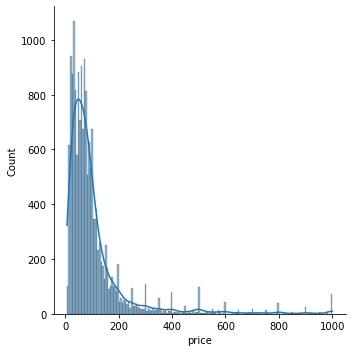

In [13]:
sns.displot(copy["price"], kde = True)

# Ejercicio 4
-Definid cuáles son las variables predictoras y la variable respuesta. Debéis tener en cuenta que lo que vamos a querer saber es de que depende el precio de las casas.

👩🏻👩🏻‍🦰💬

variable_respuesta= "price"

variables_predictoras= "neighbourhood_group"

# Ejercicio 5
-Plantead una hipótesis alternativa. ¿Qué variables creeis que afectarán al precio de una casa?

👩🏻👩🏻‍🦰💬

H1= El precio varía en función de: "neighbourhood_group", "room_type", "number_of_reviews"

HO= El precio varía en función de: "neighbourhood_group", "room_type", "number_of_reviews"

# Ejercicio 6
-Evaluad la normalidad de la variable respuesta. Hacedlo visualmente usando un histplot o un displot

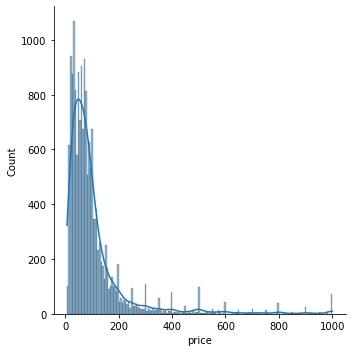

In [14]:
sns.displot(copy["price"], kde = True)

In [15]:
print("De nuestra columna 'price', la MEDIA es", df["price"].mean())
print("La MEDIANA es", df["price"].median())
print("La MODA tiene tres valores y son los siguientes:", df["price"].mode())
print("El valor MÍNIMO es", df["price"].min())
print("Y el valor MÁXIMO es" , df["price"].max())

De nuestra columna 'price', la MEDIA es 106.52714983528342
La MEDIANA es 71.0
La MODA tiene tres valores y son los siguientes: 0    25
dtype: int64
El valor MÍNIMO es 7
Y el valor MÁXIMO es 1000


👩🏻👩🏻‍🦰💬

Podemos comprobar, tanto en la gráfica como en los datos obtenidos, que la media y la mediana diferen mucho entre ellos. Vemos que no tienen una distribución normal, ya que no tiene forma campana de Gauss.

# Ejercicio 7
-Evaluad la curtosis de las variables del dataset. ¿Qué tipo presenta cada variable?


In [16]:
kurtosistest(copy.price)

KurtosistestResult(statistic=63.99970426763903, pvalue=0.0)

👩🏻👩🏻‍🦰💬

Si el valor es de 0, los datos serán simétricos, y por lo tanto, tienen una distribución normal. 


# Ejercicio 8
Como hemos eliminado algunas columnas, guardad el csv para seguir trabajando con el en los siguientes ejercicios de pair programming.


In [22]:
copy.to_csv("listing_nuevo.csv")